<a href="https://colab.research.google.com/github/EmilyJarecki/ElmhurstUni/blob/main/Project_HR_IBM_Attrition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 413.7 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 1.3 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of category-encoders to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 57.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.4/85.4 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 15.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 98.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/

In [ ]:
# import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import shap
from sklearn import set_config
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, roc_auc_score, accuracy_score
# from sklearn.preprocessing import StandardScaler
#PyCaret
from pycaret.classification import *

%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IBM HR Employe Attrition Sample Data.xlsx to IBM HR Employe Attrition Sample Data.xlsx


### 1. Import Dataset

In [ ]:
import io
data = pd.read_excel(io.BytesIO(uploaded['IBM HR Employe Attrition Sample Data.xlsx']),header=0)

data = pd.read_excel('IBM HR Employe Attrition Sample Data.xlsx')

data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


### 2. Set up the Pycaret environment

In [ ]:
# remove unnecessary columns
data = data.drop(columns=['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours', 'DailyRate', 'HourlyRate', 'MonthlyRate'])

clf1 = setup(data, target = 'Attrition', session_id=786) # setup handles encoding
# A lot of data cleaning is done here
# split into 80/20


,Description,Value
0,Session id,786
1,Target,Attrition
2,Target type,Binary
3,Target mapping,"No: 0, Yes: 1"
4,Original data shape,"(1470, 28)"
5,Transformed data shape,"(1470, 47)"
6,Transformed train set shape,"(1029, 47)"
7,Transformed test set shape,"(441, 47)"
8,Numeric features,20
9,Categorical features,7


### 3. Compare Baseline

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.8766,0.8217,0.8766,0.8670,0.8615,0.4450,0.4749,0.9240
lda,Linear Discriminant Analysis,0.8746,0.8208,0.8746,0.8617,0.8596,0.4380,0.4623,0.1290
gbc,Gradient Boosting Classifier,0.8688,0.7932,0.8688,0.8555,0.8455,0.3678,0.4134,0.4580
ada,Ada Boost Classifier,0.8650,0.8067,0.8650,0.8561,0.8494,0.4006,0.4294,0.2410
ridge,Ridge Classifier,0.8630,0.8209,0.8630,0.8589,0.8218,0.2497,0.3409,0.1270
lightgbm,Light Gradient Boosting Machine,0.8562,0.8111,0.8562,0.8341,0.8306,0.3069,0.3435,1.2810
rf,Random Forest Classifier,0.8533,0.7996,0.8533,0.8361,0.7996,0.1505,0.2424,0.3390
et,Extra Trees Classifier,0.8523,0.7850,0.8523,0.8371,0.8048,0.1759,0.2626,0.4620
xgboost,Extreme Gradient Boosting,0.8494,0.7910,0.8494,0.8234,0.8261,0.2950,0.3196,0.2280
svm,SVM - Linear Kernel,0.8387,0.6489,0.8387,0.7034,0.7651,0.0000,0.0000,0.1300


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

### 4. Create Model

In [ ]:
lr_model = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8252,0.8068,0.8252,0.7978,0.8080,0.2137,0.2215
1,0.8932,0.8499,0.8932,0.8842,0.8848,0.5336,0.5460
2,0.8932,0.8369,0.8932,0.8898,0.8749,0.4718,0.5232
3,0.8835,0.8112,0.8835,0.8733,0.8730,0.5076,0.5237
4,0.9029,0.7736,0.9029,0.9017,0.8901,0.5658,0.6033
5,0.8932,0.8509,0.8932,0.9053,0.8709,0.4767,0.5594
6,0.8641,0.7969,0.8641,0.8485,0.8395,0.3545,0.3995
7,0.8641,0.7278,0.8641,0.8473,0.8462,0.3921,0.4181
8,0.8544,0.8276,0.8544,0.8395,0.8439,0.4009,0.4092


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

### 5. Tune Model

In [ ]:
tuned_lr = tune_model(lr_model, n_iter=50, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8447,0.8161,0.8447,0.8224,0.8293,0.3011,0.3120
1,0.8835,0.8513,0.8835,0.8723,0.8666,0.4422,0.4764
2,0.8932,0.8362,0.8932,0.8898,0.8749,0.4718,0.5232
3,0.8932,0.8112,0.8932,0.8862,0.8814,0.5358,0.5609
4,0.9029,0.7661,0.9029,0.9017,0.8901,0.5658,0.6033
5,0.9029,0.8570,0.9029,0.9130,0.8854,0.5389,0.6073
6,0.8544,0.8016,0.8544,0.8326,0.8318,0.3291,0.3595
7,0.8544,0.7367,0.8544,0.8326,0.8318,0.3291,0.3595
8,0.8447,0.8406,0.8447,0.8311,0.8361,0.3776,0.3823


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


In [ ]:
print(lr_model)
print(tuned_lr)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
LogisticRegression(C=8.571, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 6. Ensemble Model
Ensembling is the process of combining predictions from multiple machine learning models to create a stronger, more robust model.

Think of it like this: instead of relying on one "expert" (a single model), you ask several experts and average or vote on their answers. This tends to improve accuracy and reduce overfitting.

Types are
* Bagging
<br>
* Boosting
<br>
* Blending/Stacking

In [ ]:
bagged_lr = ensemble_model(tuned_lr, n_estimators=50)

print(bagged_lr)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.8125,0.8350,0.8059,0.8150,0.2344,0.2470
1,0.8835,0.8398,0.8835,0.8717,0.8720,0.4758,0.4931
2,0.8932,0.8283,0.8932,0.8898,0.8749,0.4718,0.5232
3,0.8835,0.8167,0.8835,0.8733,0.8730,0.5076,0.5237
4,0.9029,0.7934,0.9029,0.9017,0.8901,0.5658,0.6033
5,0.9223,0.8543,0.9223,0.9289,0.9121,0.6526,0.6960
6,0.8641,0.7900,0.8641,0.8485,0.8395,0.3545,0.3995
7,0.8544,0.7189,0.8544,0.8326,0.8318,0.3291,0.3595
8,0.8641,0.8352,0.8641,0.8492,0.8518,0.4255,0.4390


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

BaggingClassifier(bootstrap=True, bootstrap_features=False,
                  estimator=LogisticRegression(C=8.571, class_weight={},
                                               dual=False, fit_intercept=True,
                                               intercept_scaling=1,
                                               l1_ratio=None, max_iter=1000,
                                               multi_class='auto', n_jobs=None,
                                               penalty='l2', random_state=786,
                                               solver='lbfgs', tol=0.0001,
                                               verbose=0, warm_start=False),
                  max_features=1.0, max_samples=1.0, n_estimators=50,
                  n_jobs=None, oob_score=False, random_state=786, verbose=0,
                  warm_start=False)


In [ ]:
boosted_lr = ensemble_model(tuned_lr, method = 'Boosting')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.8197,0.8350,0.8225,0.8278,0.3189,0.3213
1,0.9029,0.8484,0.9029,0.8963,0.8933,0.5632,0.5836
2,0.8738,0.8240,0.8738,0.8655,0.8445,0.3315,0.4020
3,0.8738,0.8187,0.8738,0.8607,0.8599,0.4515,0.4725
4,0.8835,0.8044,0.8835,0.8745,0.8682,0.4789,0.5107
5,0.8835,0.8372,0.8835,0.8978,0.8555,0.4103,0.5080
6,0.8738,0.7681,0.8738,0.8904,0.8392,0.3394,0.4521
7,0.8544,0.7196,0.8544,0.8352,0.8383,0.3671,0.3842
8,0.8835,0.8311,0.8835,0.8733,0.8730,0.5076,0.5237


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 7. Blend Models
To get maximum value out of blending, we want to mix diverse models.
<br>
Random Forest and Gradient Boosting will capture complex interactions, while Logistic Regression will focus on linear relationships. K-Nearest Neighbors will help make predictions based on proximity to other data points.

In [ ]:
rf_model = create_model('rf')
xgb_model = create_model('xgboost')
knn_model = create_model('knn')

blended = blend_models(estimator_list = [tuned_lr, rf_model, xgb_model, knn_model])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8447,0.7687,0.8447,0.7135,0.7735,0.0000,0.0000
1,0.8641,0.8229,0.8641,0.8829,0.8163,0.1944,0.3281
2,0.8641,0.8344,0.8641,0.8829,0.8163,0.1944,0.3281
3,0.8738,0.8105,0.8738,0.8904,0.8392,0.3394,0.4521
4,0.8641,0.7992,0.8641,0.8831,0.8216,0.2635,0.3896
5,0.8350,0.7931,0.8350,0.7852,0.7764,0.0731,0.1270
6,0.8641,0.8331,0.8641,0.8831,0.8216,0.2635,0.3896
7,0.8252,0.6389,0.8252,0.6958,0.7550,-0.0187,-0.0440
8,0.8447,0.8078,0.8447,0.8690,0.7822,0.0945,0.2227


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8155,0.7148,0.8155,0.7796,0.7933,0.1443,0.1520
1,0.8738,0.8010,0.8738,0.8588,0.8522,0.3758,0.4167
2,0.8544,0.8506,0.8544,0.8321,0.8368,0.3244,0.3419
3,0.8641,0.8119,0.8641,0.8473,0.8462,0.3921,0.4181
4,0.8641,0.8140,0.8641,0.8485,0.8395,0.3545,0.3995
5,0.8252,0.7469,0.8252,0.8011,0.8095,0.2614,0.2697
6,0.8544,0.8208,0.8544,0.8326,0.8318,0.3291,0.3595
7,0.8252,0.7100,0.8252,0.7564,0.7707,0.0531,0.0785
8,0.8544,0.8345,0.8544,0.8352,0.8383,0.3671,0.3842


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8252,0.5794,0.8252,0.7555,0.7785,0.0404,0.0525
1,0.8350,0.6519,0.8350,0.7697,0.7842,0.0591,0.0851
2,0.8058,0.5945,0.8058,0.7590,0.7777,0.0704,0.0758
3,0.7961,0.6816,0.7961,0.7444,0.7645,0.0608,0.0664
4,0.8350,0.6033,0.8350,0.7970,0.8004,0.1912,0.2244
5,0.8058,0.5085,0.8058,0.7516,0.7707,0.0779,0.0878
6,0.8058,0.5722,0.8058,0.7316,0.7592,0.0172,0.0213
7,0.8058,0.4986,0.8058,0.7316,0.7592,0.0172,0.0213
8,0.8252,0.5267,0.8252,0.7732,0.7833,0.1155,0.1430


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8350,0.7529,0.8350,0.7697,0.7842,0.0591,0.0851
1,0.8835,0.8520,0.8835,0.8976,0.8523,0.3602,0.4687
2,0.8932,0.8103,0.8932,0.9052,0.8684,0.4343,0.5267
3,0.8641,0.8105,0.8641,0.8562,0.8314,0.3120,0.3863
4,0.8641,0.8331,0.8641,0.8831,0.8216,0.2635,0.3896
5,0.8544,0.7962,0.8544,0.8760,0.8027,0.1821,0.3165
6,0.8641,0.8201,0.8641,0.8831,0.8216,0.2635,0.3896
7,0.8447,0.6813,0.8447,0.8690,0.7822,0.0945,0.2227
8,0.8738,0.8358,0.8738,0.8692,0.8474,0.3815,0.4477


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

### 8. Analyze Model

In [ ]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

### 9. Interpret Model

My notes: XGBoost has built-in SHAP. This plot uses SHAP values to analyze the relationships between features and the target variable.
<br>
I built the following 3 graphs from https://colab.research.google.com/drive/1iVo19vQtD5hk-Kcjuqb2Vg33bMnA1vLu?usp=sharing#scrollTo=wDcqHmHsSRIj

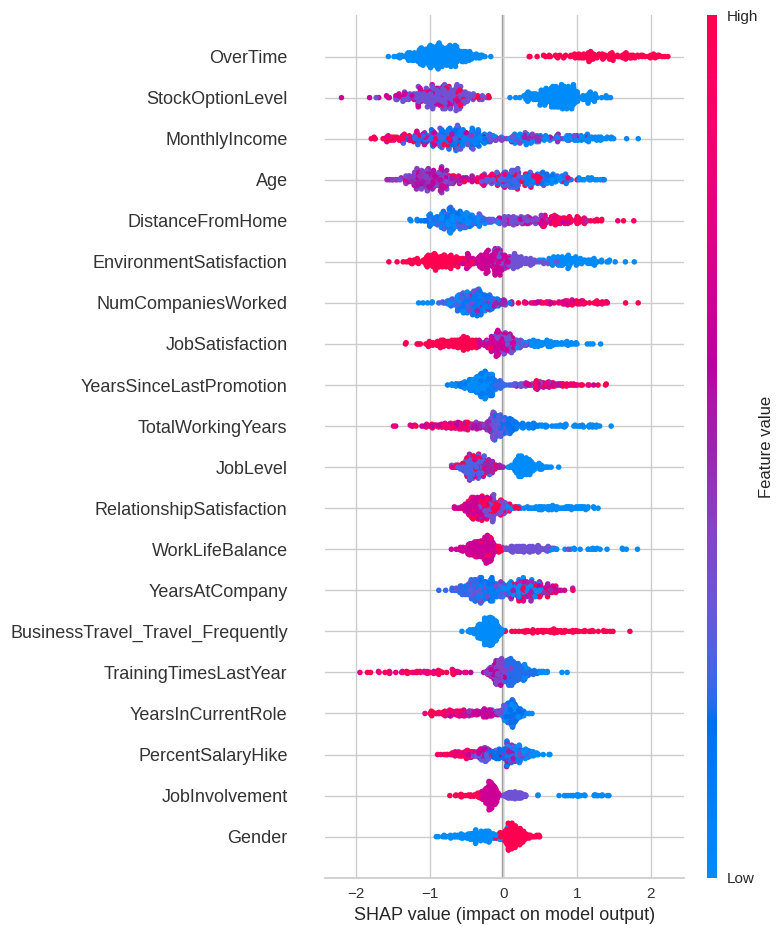

In [ ]:
interpret_model(xgb_model) # the interpret_model function only supports tree based models

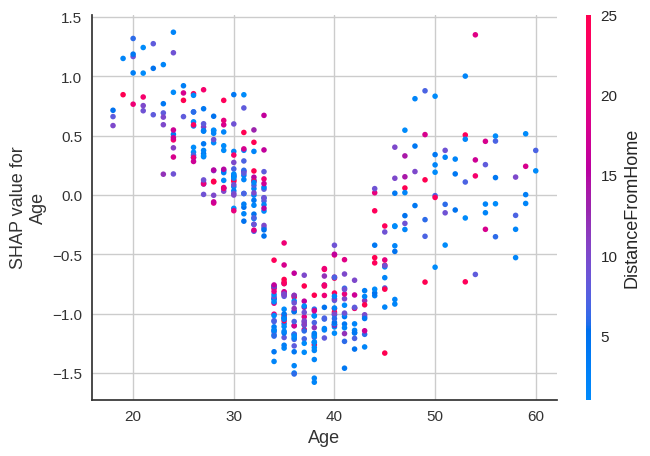

In [ ]:
interpret_model(xgb_model, plot = 'correlation')

In [ ]:
interpret_model(xgb_model, plot = 'reason', observation=1)

### 10. AutoML()

PyCaret trains all the models at the same time. Here I've decided to optimize the AUC because I have a fairly imbalanced dataset and I want to prioritize separating the classes.
<br>
"best" becomes a fully trained model.

In [ ]:
best = automl(optimize = 'AUC') # Changed the optimize parameter to 'Accuracy' which is suitable for classification tasks.
best
print(best)


LogisticRegression(C=8.571, class_weight={}, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=786, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


### 11. Predict Model

This is finally testing the predictive model created on the testing data.

In [ ]:
pred_holdouts = predict_model(tuned_lr)
pred_holdouts.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.8821,0.8512,0.8821,0.8711,0.8719,0.4945,0.5085


,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,prediction_label,prediction_score
16,32,Travel_Rarely,Research & Development,5,2,Life Sciences,1,Male,4,1,...,7,5,2,6,2,0,5,No,No,0.9299
522,37,Travel_Rarely,Research & Development,10,2,Life Sciences,4,Male,4,1,...,4,2,3,1,0,0,0,No,No,0.9527
680,36,Travel_Rarely,Research & Development,7,4,Other,2,Male,3,1,...,8,6,3,6,2,0,1,No,No,0.9574
366,41,Travel_Frequently,Sales,4,3,Marketing,1,Male,3,2,...,8,5,3,8,7,7,7,Yes,No,0.7514
393,34,Non-Travel,Sales,4,4,Marketing,3,Female,3,2,...,6,3,3,3,2,1,2,No,No,0.9210


### Save/Load Model

In [ ]:
save_model(best, model_name='best-model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('label_encoding',
                  TransformerWrapperWithInverse(exclude=None, include=None,
                                                transformer=LabelEncoder())),
                 ('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['Age', 'DistanceFromHome',
                                              'Education',
                                              'EnvironmentSatisfaction',
                                              'JobInvolvement', 'JobLevel',
                                              'JobSatisfaction', 'MonthlyIncome',
                                              'NumCompaniesWo...
                                                               handle_missing='return_nan',
                                                               handle_unknown='value',
                                                               return_df=

In [ ]:
loaded_bestmodel = load_model('best-model')
print(loaded_bestmodel)

Transformation Pipeline and Model Successfully Loaded
Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('label_encoding',
                 TransformerWrapperWithInverse(exclude=None, include=None,
                                               transformer=LabelEncoder())),
                ('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['Age', 'DistanceFromHome',
                                             'Education',
                                             'EnvironmentSatisfaction',
                                             'JobInvolvement', 'JobLevel',
                                             'JobSatisfaction', 'MonthlyIncome',
                                             'Num...
                                                              handle_missing='return_nan',
                                                              handle_unknown='value',
                                 

In [ ]:
set_config(display='diagram') # this is displaying a model pipeline
loaded_bestmodel[0] # pipeline

TransformerWrapperWithInverse(exclude=None, include=None,
                              transformer=LabelEncoder())

In [ ]:
set_config(display='text')

### 13. Deploy Model

In [ ]:
# I don't have AWS db
# deploy_model(best, model_name = 'best-aws', authentication = {'bucket' : 'pycaret-test'})